<a href="https://colab.research.google.com/github/hirdeshkumar2407/NLP_Group_Assigment/blob/main/1_ClusterTheDocuments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Cluster The Documents**

# 1.Data Loading and Basic Inspection

In [11]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from google.colab import userdata


In [10]:
import pandas as pd

df = pd.read_json("hf://datasets/FreedomIntelligence/RAG-Instruct/rag_instruct.json")

/home/fffeelipe/.conda/envs/py312/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
print(f"Total entries: {len(df)}")

Total entries: 40541


Total 40541 documents loaded in dataframe

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40541 entries, 0 to 40540
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   question   40541 non-null  object
 1   answer     40541 non-null  object
 2   documents  40541 non-null  object
dtypes: object(3)
memory usage: 950.3+ KB


In [ ]:
df.head(5)

,question,answer,documents
0,Describe the cultural impact and legacy of the...,The 1967 Disney film 'The Jungle Book' has had...,[decided to make the story more straightforwar...
1,Comparing Taiwanese and Chinese education syst...,Taiwanese students performed exceptionally wel...,[the world with 68.5% of Taiwanese high school...
2,What are some key features and applications of...,PyTorch is an open-source machine learning lib...,[Sparrho Sparrho combines human and artificial...
3,What term describes the post-war condition of ...,The term used to describe the state of Germany...,[zones received 1200 kilocalories a day in off...
4,Compare the nutritional value and potential al...,Kiwifruit is known for its vibrant green or go...,"[(oha), ahahara vegetable and many others keep..."


# 2.Length and Vocabulary Analysis

In [14]:
# --- Updated Length Analysis ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assume 'df' is your DataFrame loaded previously
# df = pd.read_json("hf://datasets/FreedomIntelligence/RAG-Instruct/rag_instruct.json")

print("\n--- 1. Investigating 'documents' column structure ---")

# Check data types within the column
print("\nData types found in 'documents' column:")
print(df['documents'].apply(type).value_counts())

# Look at the first few raw entries
print("\nFirst 5 raw entries of 'documents' column:")
try:
    # Use .tolist() for a clearer view of potential lists/dicts
    print(df['documents'].head().tolist())
except Exception as e:
    print(f"(Could not display as list, showing standard head): {e}")
    display(df['documents'].head())

# --- 2. Define a Robust Length Calculation Function ---
print("\n--- 2. Calculating Lengths with Robust Tokenizer ---")

def calculate_token_length(data_entry):
    """
    Calculates token length for different potential data structures.
    Uses simple space splitting for tokenization.
    """
    text_to_tokenize = ""
    if isinstance(data_entry, str):
        # It's a simple string
        text_to_tokenize = data_entry
    elif isinstance(data_entry, list):
        # It's a list, assume list of strings and join them
        text_to_tokenize = ' '.join(str(item) for item in data_entry if isinstance(item, str))
    # Add elif conditions here if you find other types like dicts
    # elif isinstance(data_entry, dict):
    #     # Example: extract text from a specific key
    #     text_to_tokenize = data_entry.get('text_field_key', '')

    # Tokenize the resulting text (simple space split, lowercase)
    if text_to_tokenize:
        tokens = text_to_tokenize.lower().split()
        return len(tokens)
    else:
        # Return 0 if no text could be extracted or entry was None/invalid
        return 0

# Apply the robust function to calculate lengths
for col in ['question', 'answer', 'documents']:
    col_length_name = f'{col}_length_tokens'
    print(f"Calculating length for column: {col}")
    df[col_length_name] = df[col].apply(calculate_token_length)

# --- 3. Display Updated Statistics ---
print("\n--- 3. Updated Descriptive Statistics for Token Lengths ---")
length_columns = [f'{col}_length_tokens' for col in ['question', 'answer', 'documents']]
# Check if calculation produced results before describing
if all(col in df.columns for col in length_columns):
     display(df[length_columns].describe())
else:
     print("Length calculation failed for some columns.")


# --- 4. Plot Updated Distributions ---
print("\n--- 4. Plotting Updated Length Distributions ---")
plt.figure(figsize=(18, 5))

# Check if length column exists before plotting
if 'question_length_tokens' in df.columns:
    plt.subplot(1, 3, 1)
    sns.histplot(df['question_length_tokens'], bins=50, kde=False)
    plt.title('Question Length Distribution')
    plt.xlabel("Length (Tokens)")
else:
     print("Skipping plot for question length.")

if 'answer_length_tokens' in df.columns:
    plt.subplot(1, 3, 2)
    sns.histplot(df['answer_length_tokens'], bins=50, kde=False)
    plt.title('Answer Length Distribution')
    plt.xlabel("Length (Tokens)")
else:
     print("Skipping plot for answer length.")

if 'documents_length_tokens' in df.columns:
    plt.subplot(1, 3, 3)
    # Use a log scale for y-axis if counts are very high for some bins, but check data first
    # Check if max length > 0 before plotting
    if df['documents_length_tokens'].max() > 0:
        sns.histplot(df['documents_length_tokens'], bins=50, kde=False)
        plt.title('Documents (Context) Length Distribution')
        plt.xlabel("Length (Tokens)")
        # Optional: Apply log scale if distribution is heavily skewed
        # plt.yscale('log')
        # plt.title('Documents (Context) Length Distribution (Log Scale Y-axis)')
    else:
        plt.text(0.5, 0.5, 'No valid lengths > 0 found for documents',
                 horizontalalignment='center', verticalalignment='center',
                 transform=plt.gca().transAxes)
        plt.title('Documents (Context) Length Distribution')
        plt.xlabel("Length (Tokens)")

else:
     print("Skipping plot for documents length.")


plt.tight_layout()
plt.show()

# --- 5. Interpretation (Add Markdown Cell Here) ---
# Based on the UPDATED statistics and plots:
# - Describe the typical length and spread for questions, answers, and NOW documents.
# - Did the investigation reveal the structure of the 'documents' column?
# - Does the document length distribution look reasonable now? Is it skewed?
# - Mention any implications for later processing (e.g., maximum sequence lengths for models).

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
import nltk
print("--- NLTK Resource Check ---")
# --- Download 'punkt' if needed ---
try:
    nltk.data.find('tokenizers/punkt')
    print("NLTK 'punkt' resource found.")
except LookupError:
    print("NLTK 'punkt' not found. Downloading...")
    try:
        nltk.download('punkt', quiet=True)
        print("NLTK 'punkt' downloaded successfully.")
    except Exception as download_error:
        print(f"ERROR: Failed to download NLTK 'punkt': {download_error}")

# --- Download 'punkt_tab' if needed ---
try:
    # Note: 'punkt_tab' might not be directly findable this way,
    # but word_tokenize might load it internally. We attempt download if tokenization fails below.
    # Let's proactively try downloading it based on the error.
    print("Attempting proactive download of NLTK 'punkt_tab'...")
    nltk.download('punkt_tab', quiet=True)
    print("NLTK 'punkt_tab' download attempted (check output for errors).")
except Exception as download_error:
     print(f"ERROR: Failed to download NLTK 'punkt_tab': {download_error}")


# --- NLTK Sanity Check ---
print("\n--- Running NLTK Sanity Check ---")
try:
    test_string = "This is a simple test."
    tokens = nltk.word_tokenize(test_string) # This line triggered the error before
    print(f"  Input: '{test_string}'")
    print(f"  Tokens: {tokens}")
    print(f"  Length: {len(tokens)}")
    if len(tokens) > 0:
        print("  --> NLTK tokenization seems OK.")
    else:
        print("  --> NLTK tokenization FAILED on simple string!")
except LookupError as le:
    # Catch LookupError specifically, as it might indicate other missing resources
    print(f"  --> NLTK tokenization CRASHED (LookupError): {le}")
    print("      Another NLTK resource might be missing. Try downloading it.")
except Exception as e:
    print(f"  --> NLTK tokenization CRASHED (Other Error): {e}")

--- NLTK Resource Check ---
NLTK 'punkt' resource found.
Attempting proactive download of NLTK 'punkt_tab'...
NLTK 'punkt_tab' download attempted (check output for errors).

--- Running NLTK Sanity Check ---
  Input: 'This is a simple test.'
  Tokens: ['This', 'is', 'a', 'simple', 'test', '.']
  Length: 6
  --> NLTK tokenization seems OK.


In [16]:
import pandas as pd
import nltk
# Assume 'df' is loaded

print("\n--- Manual Inspection and Processing of First 3 Rows (NLTK OK) ---")

# Columns to inspect
columns_to_inspect = ['question', 'answer', 'documents']

for idx in range(min(3, len(df))): # Look at first 3 rows
    print(f"\n=== Row Index: {idx} ===")
    for col in columns_to_inspect:
        print(f"\n  --- Column: '{col}' ---")
        original_value = df.loc[idx, col]
        value_type = type(original_value)
        value_repr = repr(original_value)
        # Limit printing potentially huge strings in repr
        value_repr_short = (value_repr[:200] + '...') if len(value_repr) > 200 else value_repr

        print(f"    Original Value Type: {value_type}")
        print(f"    Original Value Repr: {value_repr_short}")

        # --- Step A: Force to String and Strip ---
        try:
            stripped_value = str(original_value).strip()
            stripped_repr = repr(stripped_value)
            stripped_repr_short = (stripped_repr[:200] + '...') if len(stripped_repr) > 200 else stripped_repr
            print(f"    Stripped Value Repr: {stripped_repr_short}")
            print(f"    Is Stripped Value Empty?: {not bool(stripped_value)}")
        except Exception as e:
            print(f"    ERROR during str() or strip(): {e}")
            stripped_value = None # Mark as failed

        # --- Step B: Attempt NLTK Tokenization ---
        if stripped_value is not None and stripped_value: # Only tokenize if stripping worked and result is not empty
            print(f"    Attempting NLTK Tokenization on stripped value...")
            try:
                tokens = nltk.word_tokenize(stripped_value)
                print(f"      NLTK Tokens: {tokens[:15]} {'...' if len(tokens)>15 else ''}") # Show first few tokens
                print(f"      NLTK Token Count: {len(tokens)}")
            except Exception as e:
                print(f"      ERROR during nltk.word_tokenize(): {e}")
                tokens = [] # Mark as failed
                print(f"      NLTK Token Count: 0")
        elif stripped_value is not None and not stripped_value:
             print(f"    Skipping NLTK Tokenization because stripped value is empty.")
             print(f"      NLTK Token Count: 0")
        else:
             print(f"    Skipping NLTK Tokenization because stripping failed.")
             print(f"      NLTK Token Count: 0")


--- Manual Inspection and Processing of First 3 Rows (NLTK OK) ---

=== Row Index: 0 ===

  --- Column: 'question' ---
    Original Value Type: <class 'str'>
    Original Value Repr: "Describe the cultural impact and legacy of the 1967 Disney film 'The Jungle Book' on animation and popular culture."
    Stripped Value Repr: "Describe the cultural impact and legacy of the 1967 Disney film 'The Jungle Book' on animation and popular culture."
    Is Stripped Value Empty?: False
    Attempting NLTK Tokenization on stripped value...
      NLTK Tokens: ['Describe', 'the', 'cultural', 'impact', 'and', 'legacy', 'of', 'the', '1967', 'Disney', 'film', "'The", 'Jungle', 'Book', "'"] ...
      NLTK Token Count: 21

  --- Column: 'answer' ---
    Original Value Type: <class 'str'>
    Original Value Repr: "The 1967 Disney film 'The Jungle Book' has had a profound impact on animation and popular culture. It was the last animated film produced by Walt Disney himself, marking an end to an era of his

**Do random sampling of 10% of the dataset**

NLTK 'punkt' not found. Downloading...
NLTK 'punkt' downloaded successfully.
NLTK 'punkt_tab' download attempted.
--- Loading Full Dataset ---
Full dataset shape: (40541, 3)

--- Sampling the Dataset ---
Sampled dataset shape: (4054, 3)

--- Running Analysis on the SAMPLE ---

--- Running Length Analysis on Sample ---

Final Descriptive Statistics for Token Lengths (Sample):


,question_length_final,answer_length_final,documents_length_final
count,4054.000000,4054.000000,4054.000000
mean,23.282437,104.570794,1166.352738
std,13.247102,63.033743,46.004274
min,6.000000,1.000000,1084.000000
25%,15.000000,64.000000,1136.000000
50%,19.000000,95.000000,1156.000000
75%,26.000000,132.000000,1185.000000
max,113.000000,638.000000,1494.000000



Plotting Final Length Distributions (Sample):


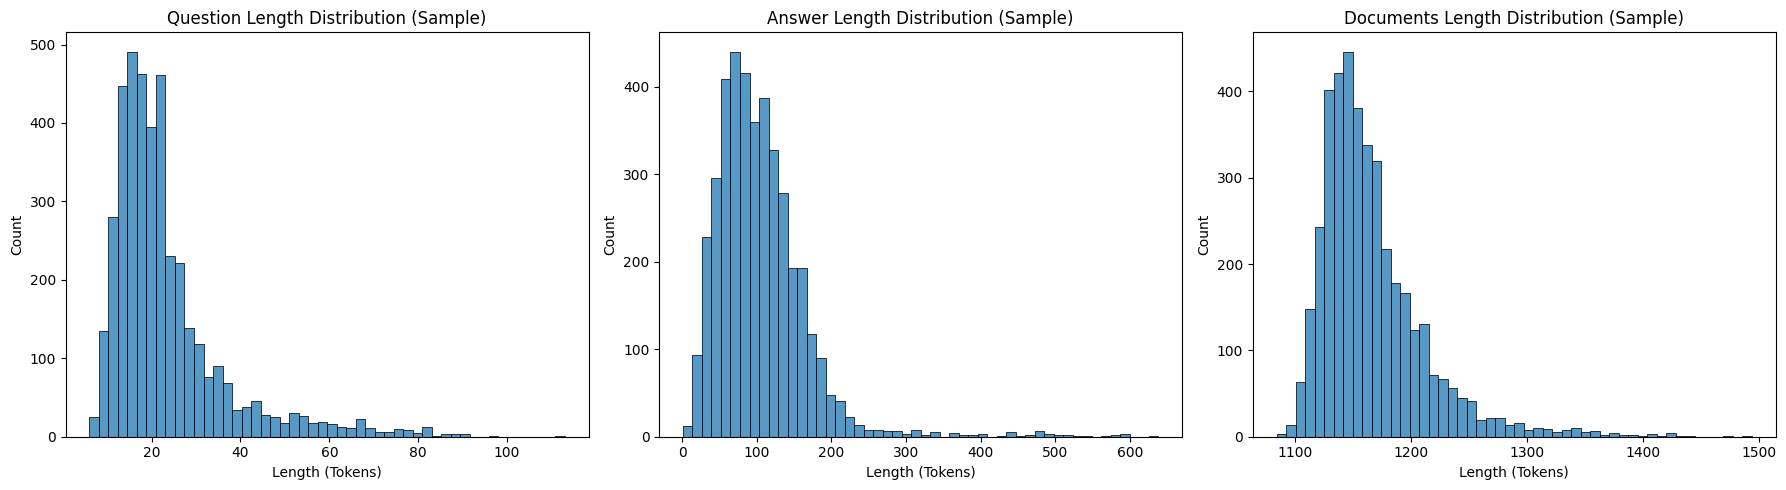


--- Running Vocabulary Analysis on Sample (Focusing on Documents) ---
Tokenizing all documents in sample for collection vocabulary...

Total Collection Vocabulary Size (Sample - Unique Tokens in Documents): 184890

Calculating vocabulary size per document entry in sample...
Average Vocabulary Size per Document Entry (Sample - Context): 491.16
Standard Deviation of Vocabulary Size per Document Entry (Sample): 45.32


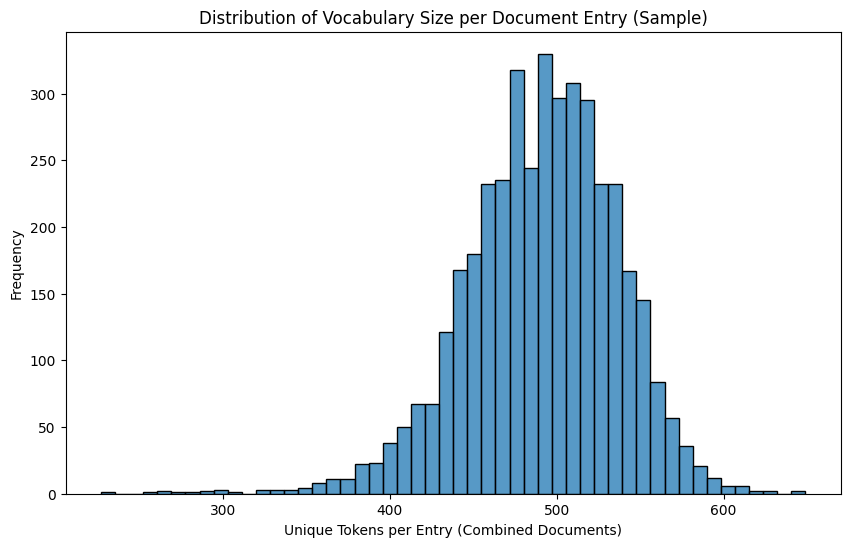

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
import nltk # Make sure NLTK and 'punkt' are available

# --- NLTK Resource Check (Run once) ---
try:
    nltk.data.find('tokenizers/punkt')
    print("NLTK 'punkt' resource found.")
except LookupError:
    print("NLTK 'punkt' not found. Downloading...")
    try:
        nltk.download('punkt', quiet=True)
        print("NLTK 'punkt' downloaded successfully.")
    except Exception as download_error:
        print(f"ERROR: Failed to download NLTK 'punkt': {download_error}")
# Add punkt_tab download if needed based on previous errors
try:
    nltk.download('punkt_tab', quiet=True, raise_on_error=False) # Attempt download
    print("NLTK 'punkt_tab' download attempted.")
except Exception as e:
     print(f"Could not attempt punkt_tab download: {e}")
# -------------------------------------


# --- 1. Load Full Dataset ---
print("--- Loading Full Dataset ---")
# Assume df is already loaded from your previous steps
# df = pd.read_json("hf://datasets/FreedomIntelligence/RAG-Instruct/rag_instruct.json")
print(f"Full dataset shape: {df.shape}")

# --- 2. Sample the Dataset ---
# --- Choose your sample size ---
# Option A: Fraction (e.g., 10%)
sample_fraction = 0.10 # Adjust as needed (0.1 = 10%, 0.2 = 20%)
# Option B: Fixed number (e.g., 5000 rows)
# sample_size = 5000 # Uncomment and adjust if you prefer a fixed size

print(f"\n--- Sampling the Dataset ---")
try:
    # Use fraction
    df_sample = df.sample(frac=sample_fraction, random_state=42) # Use random_state for reproducibility
    # Or use fixed size (uncomment ONE of these)
    # df_sample = df.sample(n=sample_size, random_state=42)
    print(f"Sampled dataset shape: {df_sample.shape}")
except ValueError as e:
     print(f"Error during sampling (maybe sample size > dataset size?): {e}")
     print("Using full dataset instead.")
     df_sample = df # Fallback to full df if sampling fails


# --- 3. Define CORRECTED Processing Functions (from previous step) ---
# (These functions operate on single rows, so they don't need changing)
def calculate_token_length_list_robust(data_entry):
    """Calculates token length assuming input is a list of strings."""
    total_tokens = 0
    if isinstance(data_entry, list):
        for item in data_entry:
            if isinstance(item, str):
                text = item.strip() # Strip individual strings
                if text:
                    try:
                        tokens = nltk.word_tokenize(text)
                        total_tokens += len(tokens)
                    except Exception:
                        pass # Ignore tokenization errors on individual strings
        return total_tokens
    elif isinstance(data_entry, str): # Handle cases where it might be just a string
         text = data_entry.strip()
         if text:
             try:
                 return len(nltk.word_tokenize(text))
             except Exception:
                 return 0
    return 0

def extract_and_tokenize_list_robust(data_entry):
    """Extracts and tokenizes text assuming input is a list of strings."""
    all_tokens = []
    if isinstance(data_entry, list):
        for item in data_entry:
            if isinstance(item, str):
                text = item.strip()
                if text:
                    try:
                        tokens = nltk.word_tokenize(text)
                        all_tokens.extend(tokens)
                    except Exception:
                        pass # Ignore tokenization errors
    elif isinstance(data_entry, str): # Handle cases where it might be just a string
        text = data_entry.strip()
        if text:
             try:
                 return nltk.word_tokenize(text)
             except Exception:
                 return []
    return all_tokens

# --- 4. Run Analysis on the SAMPLE ---
print("\n--- Running Analysis on the SAMPLE ---")

# --- 4a. Length Analysis on SAMPLE ---
print("\n--- Running Length Analysis on Sample ---")
# Apply functions to the sampled DataFrame
df_sample = df_sample.copy() # Avoid SettingWithCopyWarning
df_sample['question_length_final'] = df_sample['question'].apply(calculate_token_length_list_robust)
df_sample['answer_length_final'] = df_sample['answer'].apply(calculate_token_length_list_robust)
df_sample['documents_length_final'] = df_sample['documents'].apply(calculate_token_length_list_robust)

# Display length statistics for the SAMPLE
length_columns_final = ['question_length_final', 'answer_length_final', 'documents_length_final']
print("\nFinal Descriptive Statistics for Token Lengths (Sample):")
display(df_sample[length_columns_final].describe())

# Plot distributions for the SAMPLE
print("\nPlotting Final Length Distributions (Sample):")
plt.figure(figsize=(18, 5))
# (Plotting code is the same, just uses df_sample)
plt.subplot(1, 3, 1)
sns.histplot(df_sample['question_length_final'], bins=50, kde=False)
plt.title('Question Length Distribution (Sample)')
plt.xlabel("Length (Tokens)")
# ... (rest of plotting code for answer and documents, using df_sample) ...
plt.subplot(1, 3, 2)
sns.histplot(df_sample['answer_length_final'], bins=50, kde=False)
plt.title('Answer Length Distribution (Sample)')
plt.xlabel("Length (Tokens)")

plt.subplot(1, 3, 3)
if 'documents_length_final' in df_sample.columns and df_sample['documents_length_final'].max() > 0:
    sns.histplot(df_sample['documents_length_final'], bins=50, kde=False)
    plt.title('Documents Length Distribution (Sample)')
    plt.xlabel("Length (Tokens)")
else:
    plt.text(0.5, 0.5, 'Calculation Failed for Documents (Sample)',
             horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, color='red')
    plt.title('Documents Length Distribution (Sample)')
    plt.xlabel("Length (Tokens)")

plt.tight_layout()
plt.show()


# --- 4b. Vocabulary Analysis on SAMPLE ---
print("\n--- Running Vocabulary Analysis on Sample (Focusing on Documents) ---")
# --- Collection Vocabulary (SAMPLE) ---
print("Tokenizing all documents in sample for collection vocabulary...")
all_document_tokens_sample = []
# Iterate over the documents column in the SAMPLE DataFrame
for doc_list in df_sample['documents']:
     all_document_tokens_sample.extend(extract_and_tokenize_list_robust(doc_list))

collection_vocab_sample = set(all_document_tokens_sample)
collection_vocab_size_sample = len(collection_vocab_sample)
print(f"\nTotal Collection Vocabulary Size (Sample - Unique Tokens in Documents): {collection_vocab_size_sample}")


# --- Average Vocabulary Size per Document Entry (SAMPLE) ---
print("\nCalculating vocabulary size per document entry in sample...")
doc_vocab_sizes_sample = []
# Iterate over the documents column in the SAMPLE DataFrame
for doc_list in df_sample['documents']:
    doc_tokens = extract_and_tokenize_list_robust(doc_list)
    doc_vocab_sizes_sample.append(len(set(doc_tokens)))

avg_doc_vocab_sample = np.mean(doc_vocab_sizes_sample) if doc_vocab_sizes_sample else 0
std_doc_vocab_sample = np.std(doc_vocab_sizes_sample) if doc_vocab_sizes_sample else 0
print(f"Average Vocabulary Size per Document Entry (Sample - Context): {avg_doc_vocab_sample:.2f}")
print(f"Standard Deviation of Vocabulary Size per Document Entry (Sample): {std_doc_vocab_sample:.2f}")

# --- Plot Distribution (SAMPLE) ---
plt.figure(figsize=(10, 6))
sns.histplot(doc_vocab_sizes_sample, bins=50, kde=False)
plt.title('Distribution of Vocabulary Size per Document Entry (Sample)')
plt.xlabel('Unique Tokens per Entry (Combined Documents)')
plt.ylabel('Frequency')
plt.show()

# --- 5. Interpretation ---
# Add your Markdown interpretation here based on the SAMPLE results.
# Remember to mention that these results are based on a sample (e.g., 10%) of the data.

** Summary **

Data Structure: The documents column contains lists of strings. The question and answer columns contain strings.

**Lengths:**

1.   Questions are relatively short (mean 23 tokens).
2.   Answers are moderately long (mean 105 tokens).
3.   The provided context documents are consistently very long (mean 1166 tokens), significantly longer than questions/answers. The minimum context length observed in the sample is over 1000 tokens.
Vocabulary (Documents): The context documents utilize a large and diverse vocabulary (over 184k unique tokens in the 10% sample alone), suggesting they cover a wide range of topics or use complex languageList item


**Advice:**
The long context length (~1166 tokens) is important for model selection. Many standard transformer models have default maximum input lengths of 512 or 1024 tokens. You will likely need to:
Use models designed for longer contexts (e.g., Longformer, BigBird).
Implement strategies to truncate or summarize the context documents before feeding them to a standard model.
Consider RAG strategies that might retrieve smaller, more relevant chunks instead of using the entire provided document list unprocessed (though this dataset seems designed with the long context provided).

#3.Clustering

In [ ]:
# Imports for clustering analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD # Good for sparse matrices like TF-IDF

# Assume df_sample is already loaded and available from previous steps
print(f"Using df_sample with shape: {df_sample.shape}")


Using df_sample with shape: (4054, 8)


 TF-IDF vectorization where you want one vector per row representing the text associated with that row, and the text happens to be stored as a list of strings within that row, you need to combine those strings first.

In [ ]:
# Define the function to combine list of strings into one string
def combine_document_texts(data_entry):
    """Joins strings from a list into a single string."""
    if isinstance(data_entry, list):
        # Join valid strings with a space
        return ' '.join(str(item).strip() for item in data_entry if isinstance(item, str) and str(item).strip())
    elif isinstance(data_entry, str):
        return data_entry.strip() # Handle if it's already a string
    return "" # Return empty string for other types

# Apply this function to the 'documents' column in our sample
print("Creating 'combined_documents' column...")
# Ensure we're not modifying a slice directly if needed (depends on how df_sample was created)
# df_sample = df_sample.copy()
df_sample['combined_documents'] = df_sample['documents'].apply(combine_document_texts)

# Verify: check for empty strings and view the first couple of rows
num_empty = (df_sample['combined_documents'] == '').sum()
print(f"Number of rows with empty combined documents: {num_empty}")
if num_empty > 0:
    print("Warning: Some rows resulted in empty combined documents. Check the original data or function.")

print("\nHead of relevant columns after combining text:")
# Displaying full combined text might be too much, show limited width
pd.set_option('display.max_colwidth', 100) # Limit display width
display(df_sample[['documents', 'combined_documents']].head(3))
pd.reset_option('display.max_colwidth') # Reset display width

Creating 'combined_documents' column...
Number of rows with empty combined documents: 0

Head of relevant columns after combining text:


,documents,combined_documents
34345,[its natural environment. Although cultural tourism provides opportunities for understanding and...,its natural environment. Although cultural tourism provides opportunities for understanding and ...
30356,[Private Communications Technology Private Communications Technology (PCT) 1.0 was a protocol de...,Private Communications Technology Private Communications Technology (PCT) 1.0 was a protocol dev...
1640,[housed in the former home and studio of artist Nicolai Fechin. Taos art colony The Taos art col...,housed in the former home and studio of artist Nicolai Fechin. Taos art colony The Taos art colo...


Vectorization (TF-IDF)

Instead of limiting by the absolute number of features (max_features), using min_df and max_df controls the vocabulary based on document frequency:
min_df=5: Ignores words that appear in fewer than 5 documents in your sample (df_sample). This helps remove very rare words or potential typos.
max_df=0.8: Ignores words that appear in more than 80% of the documents in your sample. These words are often too common within this specific corpus to be discriminative (acting like corpus-specific stop words).
stop_words='english': Removes common English stop words (like "the", "a", "is", "in").

In [ ]:
# Cell 4: Vectorization (TF-IDF) - Using min_df and max_df

# Vectorize the combined document text using TF-IDF

# --- User-defined vectorizer initialization ---
vectorizer = TfidfVectorizer(max_df=0.8, min_df=5, stop_words='english')
print(f"Initializing TF-IDF Vectorizer with min_df={vectorizer.min_df}, max_df={vectorizer.max_df}...")
# ---------------------------------------------

# Handle potential NaN values before fitting (though previous step should minimize this)
if df_sample['combined_documents'].isnull().any():
    print("Warning: Filling NaN in 'combined_documents' with empty string.")
    df_sample['combined_documents'].fillna('', inplace=True)

print("Fitting TF-IDF vectorizer and transforming data...")
try:
    tfidf_matrix = vectorizer.fit_transform(df_sample['combined_documents'])
    print(f"TF-IDF matrix created successfully.")
    # The number of features will now be determined by min/max_df, not fixed
    print(f"Shape of TF-IDF matrix: {tfidf_matrix.shape} (rows, features)")
except Exception as e:
    print(f"Error during TF-IDF vectorization: {e}")
    # Handle error - maybe stop execution or assign None to tfidf_matrix
    tfidf_matrix = None

# Optional: Look at some features (words) learned by the vectorizer
# if tfidf_matrix is not None:
#    print("\nSample features (words) learned by vectorizer:")
#    try:
#        # Get feature names (the vocabulary)
#        feature_names = vectorizer.get_feature_names_out()
#        print(f"Total features found: {len(feature_names)}")
#        print(f"Sample: {feature_names[:20]}") # Show first 20 features
#    except Exception as e:
#        print(f"Could not get feature names: {e}")

Initializing TF-IDF Vectorizer with min_df=5, max_df=0.8...
Fitting TF-IDF vectorizer and transforming data...
TF-IDF matrix created successfully.
Shape of TF-IDF matrix: (4054, 27692) (rows, features)


## Word2Vec

In [47]:
# extra imports
import gensim
import re
import nltk
import string

from gensim.models.word2vec import Word2Vec
from nltk.tokenize import sent_tokenize, word_tokenize

In [44]:
bulk_list = list(df["question"]) + list(df["answer"]) + list(df["documents"])
bulk_list = [subitem for item in bulk_list for subitem in (item if isinstance(item, list) else [item])]
sentences = []
for doc in bulk_list:
    # Step 1: Split into sentences
    if not doc:
        continue
    for sent in sent_tokenize(doc):
        # Step 2: Tokenize into words
        words = word_tokenize(sent)
        # Step 3: Remove punctuation
        words = [w for w in words if w not in string.punctuation]
        if words:  # ignore empty sentences
            sentences.append(words)



In [48]:
model = Word2Vec(sentences, vector_size=30, min_count=5, window=10)

In [ ]:
# yep, similar terms make intuitive sense =D
term = 'AI'
model.wv.most_similar(term)

[('AGI', 0.8865019679069519),
 ('intelligence', 0.8271801471710205),
 ('Kurzweil', 0.7880634069442749),
 ('intelligent', 0.782584547996521),
 ('superintelligence', 0.7668220400810242),
 ('superintelligent', 0.7572656273841858),
 ('approach', 0.7329238057136536),
 ('technology', 0.7327033281326294),
 ('optimistic', 0.7065154314041138),
 ('robotics', 0.703853189945221)]

In [ ]:
#the classic one also works, nice!
vec = model.wv.get_vector('king') + (model.wv.get_vector('woman') - model.wv.get_vector('man'))
model.wv.similar_by_vector(vec)

[('king', 0.9510528445243835),
 ('emperor', 0.9171716570854187),
 ('prince', 0.9055044651031494),
 ('throne', 0.9034609794616699),
 ('heir', 0.876512348651886),
 ('monarch', 0.8689488768577576),
 ('Emperor', 0.8603543043136597),
 ('queen', 0.8521907329559326),
 ('heirs', 0.8481841087341309),
 ('Empress', 0.8475672006607056)]